@RashiSinghvi

reference: https://pypi.org/project/marketing-attribution-models/

***1. About the Class***<br>
Python Class created to address problems regarding Digital Marketing Attribution.

***About Multi-Channel Attribution***<br>
While browsing online, an user has multiple touchpoints before converting, which could lead to ever so longer and more complex journeys.

How to duly credit conversions and optmize investment on media?

To adress this, we apply Attribution Models.

****Attribution Models****<br>
<b>Heuristic Models:</b>

<b>Last Interaction:</b>

Default attribution in Gogle Analytics and other media platforms such as Google Ads and Facebook Business manager;

Only the last touchpoint is credited for the conversion.

<b>Last Click Non-Direct:</b>

All direct traffic is ignored and so 100% of the result goes to the last channel through which the client got to the website before converting.

<b>First Interaction:</b>

The result is wholly attributed to the first touchpoint.

<b>Linear:</b>

Every touchpoint is equally credited.

<b>Time Decay:</b>

The more recent a touchpoint is, the more credit it gets.

<b>Position Based:</b>

In this model, 40% of the result is attributed to the last touchpoint, another 40% to the first and the remaining 20% is equally distributed among the midway channels.

<b>Algotithmic Models</b>

***Shapley Value***<br>

Used in Game Theory, this value is an estimation of the contribution of each individual player in a cooperative game.

Conversions are credited to the channels by a process of permutating the journeys. In each permutation a channel is given out to estimate how essencial it is overall.

As an example, let's look at the following hypotherical journey:

Organic Search > Facebook > Direct > $19 (as revenue)

To obtain each channel's Shapley Value, we first need to consider all conversion values for the component permutations of this given journey.

Organic Search > $7

Facebook > $6

Direct > $4

Organic Search > Facebook > $15

Organic Search > Direct > $7

Facebook > Direct > $9

Organic Search > Facebook > Direct > $19

The number of component joneys increases exponentially the more distinct channels you have: The rate is 2^n (2 to the power of n) for n channels.

In other words, with 3 distinct touchpoints there are 8 permutations. With over 15, for instance, this process is unfeasible.

By default, the order of the touchpoints isn't taken into consideration when calculating the Shapley Value, only their presence or lack there of. In order to do so, the number of permutations increases.

With that in mind, note that it is pretty difficult to use this model when considering the order of interactions. For n channels, not only there are 2^n permutations of a given channel i, but also every permutation containing i in a different position.

Some issues and limitations of Shapley Value

The number of distinct channels is limited by the exponential nature of the permutations.
When not considering the order of the touchpoints, the contribution estimated for channel A is considered the same being it preceded by B or C.
If the order is taken into account, the number of combinations skyrockets and if any combination does not exist among the observations the model considers that journey as existent with zero conversions.
Touchpoints that are unfrequent or are only present in longer journeys have their contribution underestimated.


***Markov Chains*** <br> A Markov Chain is a particular Stochastic process in which the probability distribution of any next state depends only on what the current state is, disregarding any preceeding states and their sequence.

In multichannel attriution, we can use the Markov Chains to calculate the probability of interaction between pairs of media channels with the Transition Matrix.

In regard to each channel's contribution in conversions, the Removal Effect comes in: For each jorney a given channel is removed and a conversion probability is calculated.

The value attributed to a channel, then, is obtained by the ratio of the difference between the probability of conversion in general and the probability once said channel is removed over the general probability again.

In other words, the bigger a channel's removal effect, the larger their contribution is.

When working with Markovian Processes there are no restrictions due to the quantity or order of channels. Their sequence, itself, is a fundamental part of the algorithm.

### Importing the class 

In [1]:
from marketing_attribution_models import MAM
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.DataFrame()

In [3]:
# attributions = MAM(df,
#     group_channels=True,
#     channels_colname = 'channels',
#     journey_with_conv_colname= 'has_transaction',
#     group_channels_by_id_list=['user_id'],
#     group_timestamp_colname = 'visitStartTime',
#     create_journey_id_based_on_conversion = True)

In [4]:
attributions = MAM(random_df=True)

In [5]:
attributions.DataFrame

,journey_id,channels_agg,converted_agg,conversion_value,time_till_conv_agg
0,id:0_J:0,Organic > Google Search > Google Search > Dire...,True,1,576.0 > 432.0 > 264.0 > 216.0 > 168.0 > 0.0
1,id:0_J:1,Google Display > Email Marketing > Organic > D...,True,1,240.0 > 192.0 > 72.0 > 0.0
2,id:0_J:10,Facebook > Email Marketing > Google Search > O...,True,1,336.0 > 288.0 > 192.0 > 0.0
3,id:0_J:11,Organic,True,1,0.0
4,id:0_J:12,Organic > Organic,True,1,24.0 > 0.0
...,...,...,...,...,...
20568,id:9_J:5,Google Search > Organic,True,1,24.0 > 0.0
20569,id:9_J:6,Facebook > Google Search,True,1,48.0 > 0.0
20570,id:9_J:7,Google Search,True,1,0.0
20571,id:9_J:8,Google Search > Direct,True,1,72.0 > 0.0


## Exploratory Data Analysis

### Last Click

In [6]:
attributions.attribution_last_click()
attributions.DataFrame

,journey_id,channels_agg,converted_agg,conversion_value,time_till_conv_agg,attribution_last_click_heuristic
0,id:0_J:0,Organic > Google Search > Google Search > Dire...,True,1,576.0 > 432.0 > 264.0 > 216.0 > 168.0 > 0.0,0 > 0 > 0 > 0 > 0 > 1
1,id:0_J:1,Google Display > Email Marketing > Organic > D...,True,1,240.0 > 192.0 > 72.0 > 0.0,0 > 0 > 0 > 1
2,id:0_J:10,Facebook > Email Marketing > Google Search > O...,True,1,336.0 > 288.0 > 192.0 > 0.0,0 > 0 > 0 > 1
3,id:0_J:11,Organic,True,1,0.0,1
4,id:0_J:12,Organic > Organic,True,1,24.0 > 0.0,0 > 1
...,...,...,...,...,...,...
20568,id:9_J:5,Google Search > Organic,True,1,24.0 > 0.0,0 > 1
20569,id:9_J:6,Facebook > Google Search,True,1,48.0 > 0.0,0 > 1
20570,id:9_J:7,Google Search,True,1,0.0,1
20571,id:9_J:8,Google Search > Direct,True,1,72.0 > 0.0,0 > 1


Usually the volume of data worked with is extensive, so it is impractical or even impossible to analyse results attributed to each journey with transaction. With the attribute group_by_channels_models, however, all results can be seen grouped by channel.

In [7]:
df_lcg=attributions.group_by_channels_models
df_lcg

,channels,attribution_last_click_heuristic
0,Direct,2122
1,Email Marketing,1074
2,Facebook,3117
3,Google Display,1058
4,Google Search,4183
5,Instagram,1039
6,Organic,6443
7,Youtube,1126


[]

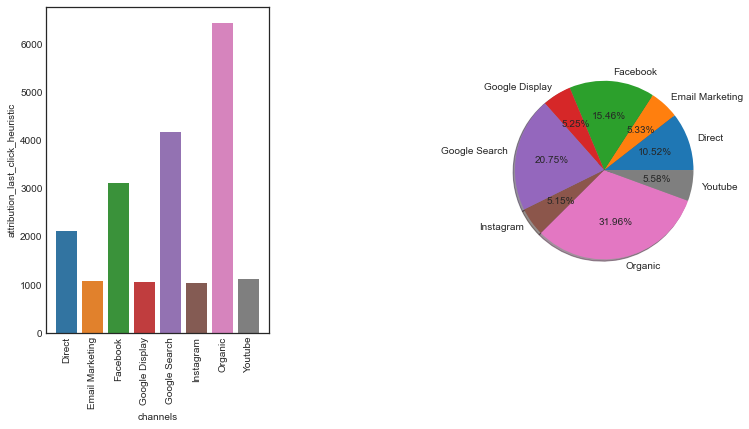

In [8]:
plt.figure(figsize=(12,6))
plt.subplots_adjust(wspace=1)
plt.subplot(1,2,1)
sns.barplot(x='channels',y='attribution_last_click_heuristic',data=df_lcg)
plt.xticks(rotation=90)
plt.plot()
plt.subplot(1,2,2)
mylabels=list(attributions.group_by_channels_models.channels)
plt.pie(x=df_lcg.attribution_last_click_heuristic,labels=mylabels,autopct = '%1.2f%%',shadow=True)
plt.plot()

***Observations:***
- According to last click graph highest nuumber of credit of conversion goes to organic search

In [9]:
attributions.attribution_shapley()
attributions.group_by_channels_models

,channels,attribution_last_click_heuristic,attribution_shapley_size4_conv_rate_algorithmic
0,Direct,2122,2125.119108
1,Email Marketing,1074,1102.414913
2,Facebook,3117,3166.951139
3,Google Display,1058,1139.853622
4,Google Search,4183,4183.263596
5,Instagram,1039,1125.487172
6,Organic,6443,6149.057187
7,Youtube,1126,1169.853263


## First Click

In [10]:
attribution_first_click = attributions.attribution_first_click()

In [11]:
# attribution_first_click[0]

In [12]:
df_fcg=attribution_first_click[1]
df_fcg

,channels,attribution_first_click_heuristic
0,Direct,2121
1,Email Marketing,1064
2,Facebook,3119
3,Google Display,1077
4,Google Search,4193
5,Instagram,1043
6,Organic,6494
7,Youtube,1051


[]

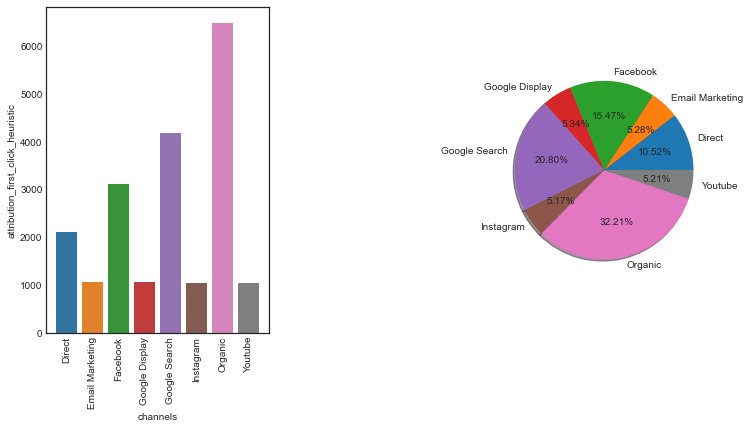

In [13]:
plt.figure(figsize=(12,6))
plt.subplots_adjust(wspace=1)
plt.subplot(1,2,1)
sns.barplot(x='channels',y='attribution_first_click_heuristic',data=df_fcg)
plt.xticks(rotation=90)
plt.plot()
plt.subplot(1,2,2)
mylabels=list(attributions.group_by_channels_models.channels)
plt.pie(x=df_fcg.attribution_first_click_heuristic,labels=mylabels,autopct = '%1.2f%%',shadow=True)
plt.plot()